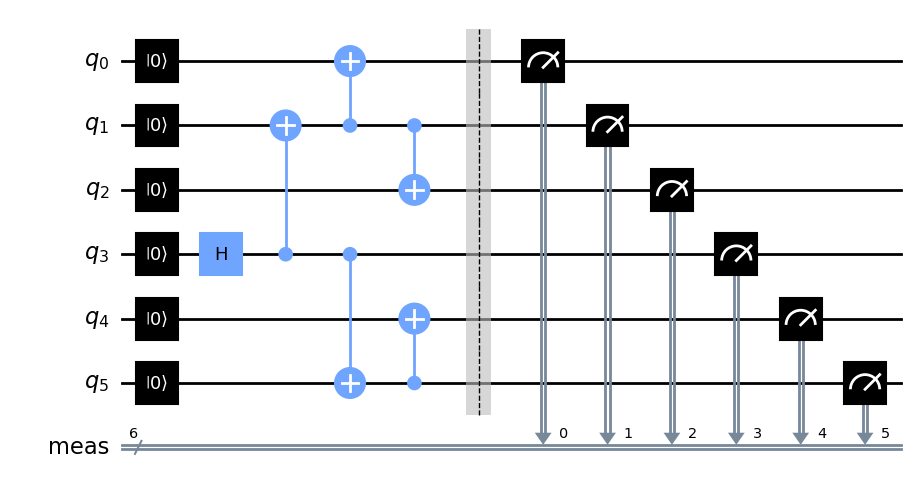

In [1]:
import numpy as np
from qiskit import *
from qiskit.providers.fake_provider import FakeCasablanca
import mthree

qc = QuantumCircuit(6)
qc.reset(range(6))
qc.h(3)
qc.cx(3,1)
qc.cx(3,5)
qc.cx(1,0)
qc.cx(5,4)
qc.cx(1,2)
qc.measure_all()
qc.draw('mpl')

In [2]:
backend = FakeCasablanca()
mit = mthree.M3Mitigation(backend)
mit.cals_from_system(range(6))

In [3]:
trans_qc = transpile(qc, backend)
raw_counts = backend.run(trans_qc).result().get_counts()

In [4]:
quasis = mit.apply_correction(raw_counts, range(6))
print('Expectation value:',quasis.expval())

Expectation value: 0.9422827323881178


In [5]:
from qiskit.providers.fake_provider import FakeMontreal

backend = FakeMontreal()
mit2 = mthree.M3Mitigation(backend)

In [6]:
qubits = [10, 12, 15, 13, 11, 14]
mit2.cals_from_system(qubits)

trans_qc = transpile(qc, backend, initial_layout=qubits)
raw_counts2 = backend.run(trans_qc).result().get_counts()

quasis2 = mit2.apply_correction(raw_counts2, qubits)
print('Expectation value:',quasis2.expval())

Expectation value: 0.9252821826026887
